<a href="https://colab.research.google.com/github/HaticeTuran/Machine-Learning-Term-Project/blob/main/ML_Project_CeydaBaloglu_HaticeTuran.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [169]:
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt
import time
import seaborn as sns


[The data set link](https://www.kaggle.com/datasets/prosperchuks/health-dataset?select=hypertension_data.csv)

Our dataset is a data set created to predict Hypertension. The data of 26083 patients were collected and the columns of this test, where we can test whether there is diabetes or not, are listed as follows: 
* age: patient's age (in years)

* sex: patient's gender (1: male; 0: female)

* cp: Chest pain type: 

 0: asymptomatic 
 1: typical angina 
 2: atypical angina 
 3: non-anginal pain

* trestbps: Resting blood pressure (in mm Hg)

* chol: Serum cholestoral in mg/dl

* fbs: if the patient's fasting blood 
 
 sugar > 120 mg/dl (1: yes; 0: no)

* restecg: Resting ECG results:

 0: normal 
 
 1: ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) 2: probable or definite left ventricular hypertrophy by Estes' criteria

* thalach: Maximum heart rate achieved.

* exang: Exercise induced angina (1: yes; 0: no)

* oldpeak: ST depression induced by exercise relative to rest.






Loading the data set

In [170]:
 path = '/content/hypertension_data.csv'

In [171]:
df = pd.read_csv(path)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,57.0,1.0,3,145,233,1,0,150,0,2.3,0,0,1,1
1,64.0,0.0,2,130,250,0,1,187,0,3.5,0,0,2,1
2,52.0,1.0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56.0,0.0,1,120,236,0,1,178,0,0.8,2,0,2,1
4,66.0,0.0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26078,72.0,0.0,0,138,294,1,1,106,0,1.9,1,3,2,0
26079,60.0,1.0,0,144,200,0,0,126,1,0.9,1,0,3,0
26080,68.0,1.0,0,100,234,0,1,156,0,0.1,2,1,3,0
26081,67.0,1.0,1,154,232,0,0,164,0,0.0,2,1,2,0


Data Visualisation

Distribution Of Age And Cholesterol By Gender

In [172]:
from matplotlib import pyplot as plt
import seaborn as sns

Text(0.5, 1, 'Distribution Of Age And Cholesterol By Gender')

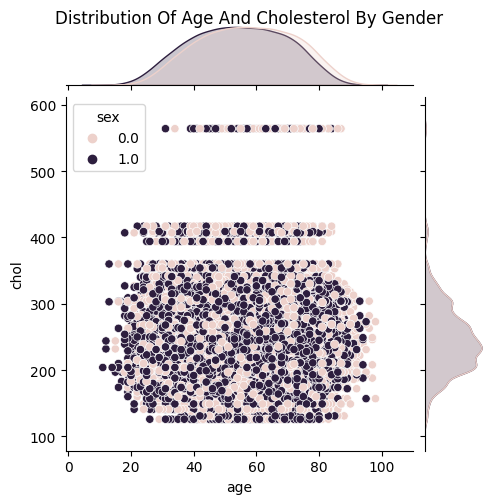

In [173]:
c = sns.jointplot(data=df, x="age", y="chol", height=5, hue="sex" ,kind="scatter", color="purple")
c.fig.suptitle('Distribution Of Age And Cholesterol By Gender',y=1)

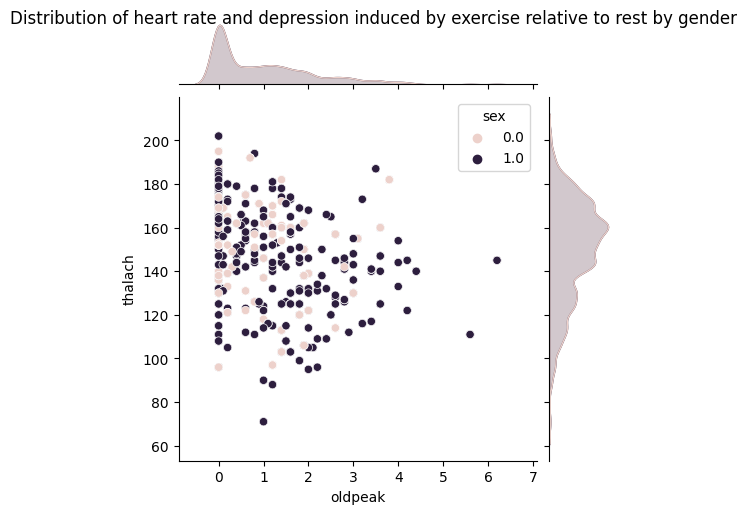

In [174]:
#thalach: Maximum heart rate achieved.
#oldpeak: ST depression induced by exercise relative to rest.
 
jp1= sns.jointplot(data=df, x="oldpeak", y="thalach", hue="sex")
plt.suptitle("Distribution of heart rate and depression induced by exercise relative to rest by gender",y=1) 

jp1.fig.set_figwidth(5)
jp1.fig.set_figheight(5)

plt.show()

Distribution of blood pressure by age and sex

[Text(0.5, 1.0, 'Distribution of blood pressure by age and sex'),
 Text(0.5, 0, 'Age'),
 Text(0, 0.5, 'Resting blood pressure (in mm Hg)')]

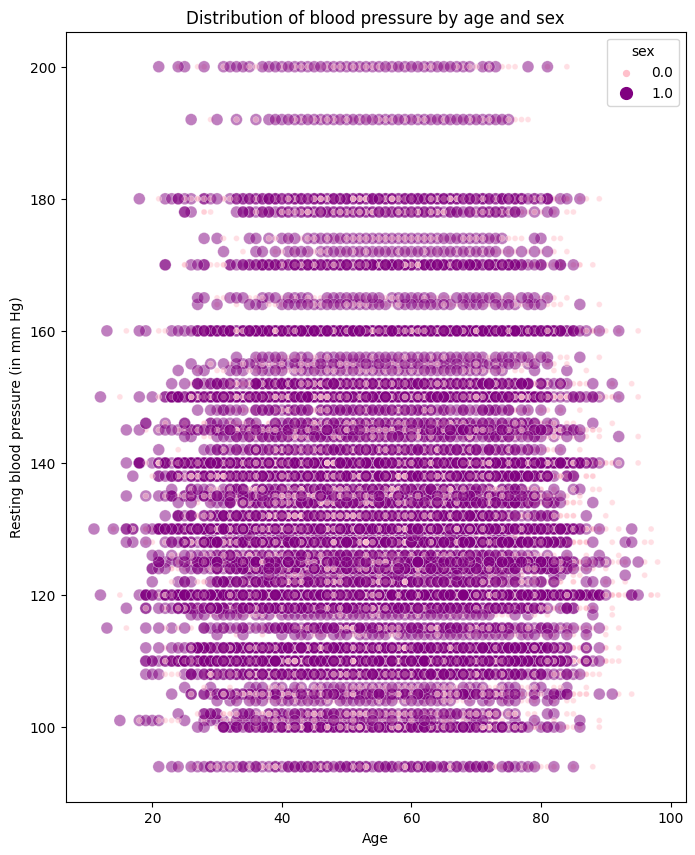

In [175]:
fig2 = plt.figure(figsize=(8,10))
p = sns.scatterplot(data=df, x="age",y="trestbps", size= "sex" ,alpha= .5, 
                    hue = 'sex', palette='blend:pink,purple')

plt.gca().update(dict(title='Distribution of blood pressure by age and sex', xlabel='Age', ylabel='Resting blood pressure (in mm Hg)'))

Deleting information consisting of empty values

In [176]:
df = df.dropna()

In [177]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,57.0,1.0,3,145,233,1,0,150,0,2.3,0,0,1,1
1,64.0,0.0,2,130,250,0,1,187,0,3.5,0,0,2,1
2,52.0,1.0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56.0,0.0,1,120,236,0,1,178,0,0.8,2,0,2,1
4,66.0,0.0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26078,72.0,0.0,0,138,294,1,1,106,0,1.9,1,3,2,0
26079,60.0,1.0,0,144,200,0,0,126,1,0.9,1,0,3,0
26080,68.0,1.0,0,100,234,0,1,156,0,0.1,2,1,3,0
26081,67.0,1.0,1,154,232,0,0,164,0,0.0,2,1,2,0


Separation of the data set into targets and features

In [178]:
X = df.drop(columns = ["target"])
Y = df['target']

In [179]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,57.0,1.0,3,145,233,1,0,150,0,2.3,0,0,1
1,64.0,0.0,2,130,250,0,1,187,0,3.5,0,0,2
2,52.0,1.0,1,130,204,0,0,172,0,1.4,2,0,2
3,56.0,0.0,1,120,236,0,1,178,0,0.8,2,0,2
4,66.0,0.0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26078,72.0,0.0,0,138,294,1,1,106,0,1.9,1,3,2
26079,60.0,1.0,0,144,200,0,0,126,1,0.9,1,0,3
26080,68.0,1.0,0,100,234,0,1,156,0,0.1,2,1,3
26081,67.0,1.0,1,154,232,0,0,164,0,0.0,2,1,2


In [180]:
Y

0        1
1        1
2        1
3        1
4        1
        ..
26078    0
26079    0
26080    0
26081    0
26082    0
Name: target, Length: 26058, dtype: int64

Splitting the dataset into training and test

In [181]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.3, random_state=42)

**Linear SVC:
Training the data set with Linear Support Vector Classification.**

 Linear SVC, is a machine learning algorithm used for binary classification tasks. It works by finding the best hyperplane that separates the classes in the input feature space. The hyperplane is chosen to maximize the margin, which is the distance between the hyperplane and the nearest data points from each class. By maximizing the margin, Linear SVC aims to achieve good generalization and robustness to new data. It can handle both linearly separable and linearly non-separable data by using a kernel trick to project the data into a higher-dimensional space.


In [182]:
from sklearn.svm import LinearSVC

In [183]:
svm_clf = LinearSVC(max_iter=100, tol=20, random_state=42)

svm_clf.fit(X_train, y_train)

LinearSVC(max_iter=100, random_state=42, tol=20)

In [184]:
y_pred = svm_clf.predict(X_test)


In [185]:
from sklearn.metrics import confusion_matrix, accuracy_score 

accuracy = accuracy_score(y_test,y_pred)*100
confusion_mat = confusion_matrix(y_test,y_pred)

In [186]:
print("Accuracy for SVM is:",accuracy)
print("Confusion Matrix")
print(confusion_mat)

Accuracy for SVM is: 48.13251470964441
Confusion Matrix
[[3495   18]
 [4037  268]]


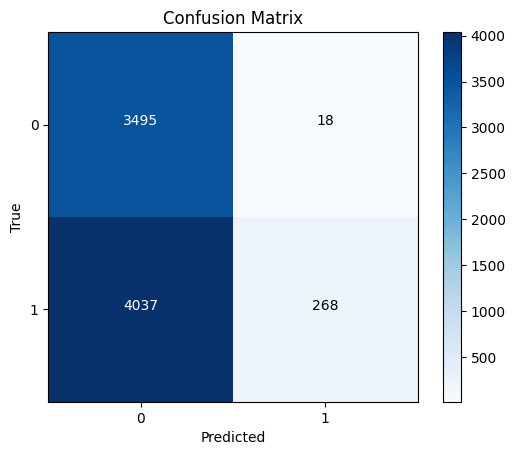

Accuracy for SVM is: 48.13251470964441


In [187]:
import matplotlib.pyplot as plt
import numpy as np

# Your code for prediction and obtaining the confusion matrix

# Visualize the confusion matrix
plt.imshow(confusion_mat, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()

# Add labels, title, and ticks
classes = np.unique(y_test)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Add text annotations
thresh = confusion_mat.max() / 2
for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, format(confusion_mat[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if confusion_mat[i, j] > thresh else "black")

# Show the plot
plt.show()

# Print the accuracy
print("Accuracy for SVM is:", accuracy)


**Grid Search & Decision Tree**

Grid Search is a technique used for hyperparameter tuning in machine learning. When combined with a Decision Tree algorithm, it works by exhaustively searching through a predefined set of hyperparameters to find the combination that yields the best performance. For each set of hyperparameters, a Decision Tree model is trained and evaluated using a specified evaluation metric (e.g., accuracy or F1 score). Grid Search helps in finding the optimal hyperparameters that maximize the performance of the Decision Tree model, allowing for improved accuracy, precision, recall, or other desired metrics.

In [188]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [189]:
from sklearn.metrics import accuracy_score

params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [ 3, 4, 5]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)

In [160]:
grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [3, 4, 5]},
             verbose=1)

In [161]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_leaf_nodes=53, min_samples_split=3, random_state=42)

In [162]:
y_pred = grid_search_cv.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

**MLP: Multilayer Perceptron**

The Multilayer Perceptron (MLP) is a type of artificial neural network that consists of multiple layers of interconnected nodes called neurons. Each neuron applies a weighted sum of inputs and passes the result through an activation function. The network is organized into an input layer, one or more hidden layers, and an output layer. During training, the weights of the connections between neurons are adjusted using backpropagation, which involves propagating the error gradient backward through the network to update the weights. This iterative learning process allows the MLP to learn complex patterns and make predictions on new input data, making it a powerful tool for various machine learning tasks such as classification and regression.

In [163]:
from sklearn.neural_network import MLPClassifier

In [164]:
#mlp_clf = MLPClassifier(random_state=42)
mlp_clf = MLPClassifier(hidden_layer_sizes=(150,100,50),
                        max_iter = 300,activation = 'relu',
                        solver = 'adam')

In [165]:
mlp_clf.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter=300)

In [166]:
y_pred = mlp_clf.predict(X_test)

In [167]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))

Accuracy: 0.98


**Voting Classifier**

The Voting Classifier is an ensemble learning method that combines multiple individual classifiers and aggregates their predictions to make a final prediction. Each individual classifier can be trained on the same dataset using different algorithms or different hyperparameters. During prediction, the Voting Classifier considers the predictions from each individual classifier and selects the class label based on a majority vote (hard voting) or the average predicted probabilities (soft voting). This ensemble approach leverages the diversity of the individual classifiers, allowing the Voting Classifier to potentially achieve better overall performance and more robust predictions than any single classifier alone.

In [168]:
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create a voting classifier
voting_classifier = VotingClassifier(
    estimators=[('mlp', mlp_clf), ('svc', svm_clf), ('dt', grid_search_cv)],
    voting='hard'  # You can also use 'soft' for soft voting
)

# Train the voting classifier
voting_classifier.fit(X_train, y_train)

# Make predictions using the voting classifier
y_pred = voting_classifier.predict(X_test)

# Evaluate the accuracy of the voting classifier
accuracy = accuracy_score(y_test, y_pred)
print("Voting Classifier Accuracy:", accuracy)

Fitting 3 folds for each of 294 candidates, totalling 882 fits
Voting Classifier Accuracy: 0.9978255308262983
